### Data loading

In [ ]:
import pandas as pd
df=pd.read_csv("Titanic_train.csv")
test_df=pd.read_csv("Titanic_test.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Removing non usefull column

In [ ]:
df.drop(columns=["Cabin", "PassengerId","Ticket","Name"], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Null values

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Removing Null values

In [ ]:
new_df=df.dropna()
new_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

dataset shape after removing null values

In [ ]:
new_df.shape

(712, 8)

### Data visualization

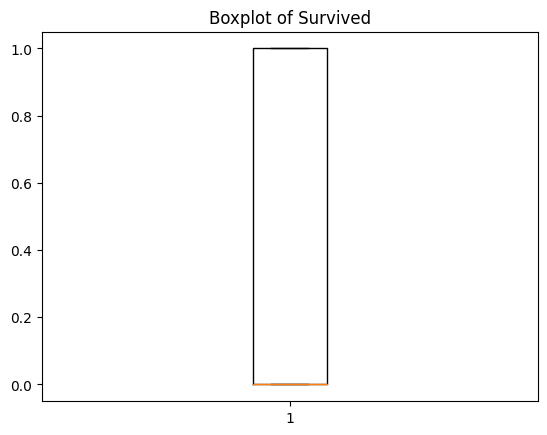

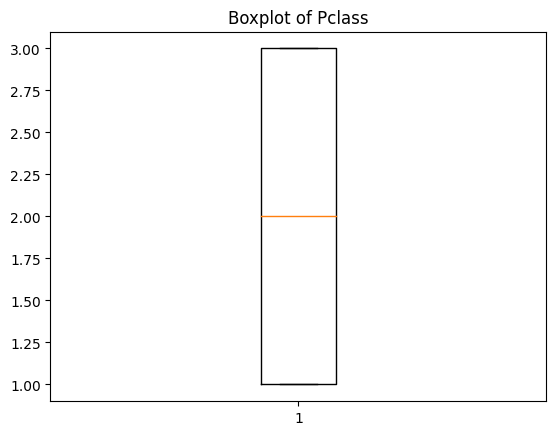

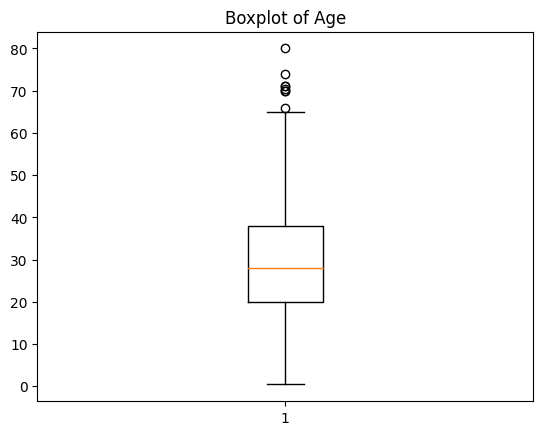

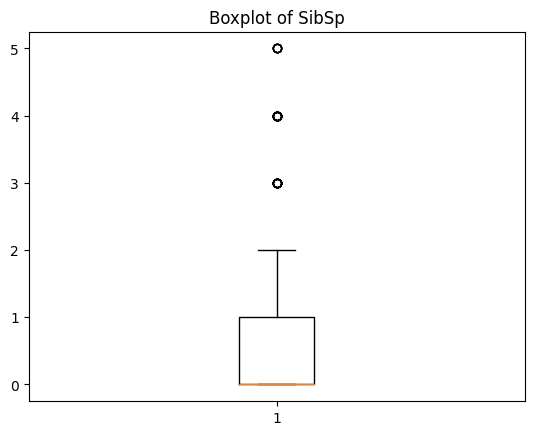

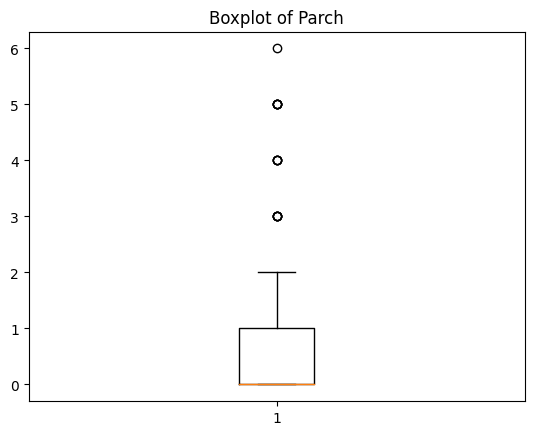

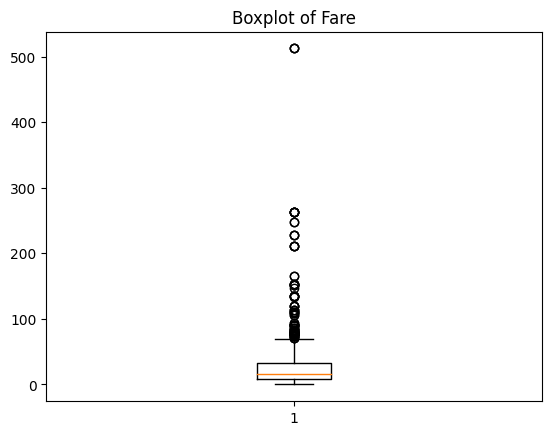

In [ ]:
# prompt: create boxplot

import matplotlib.pyplot as plt

# Create a boxplot for each numeric column
for col in new_df.select_dtypes(include=["int64", "float64"]):
    plt.boxplot(new_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


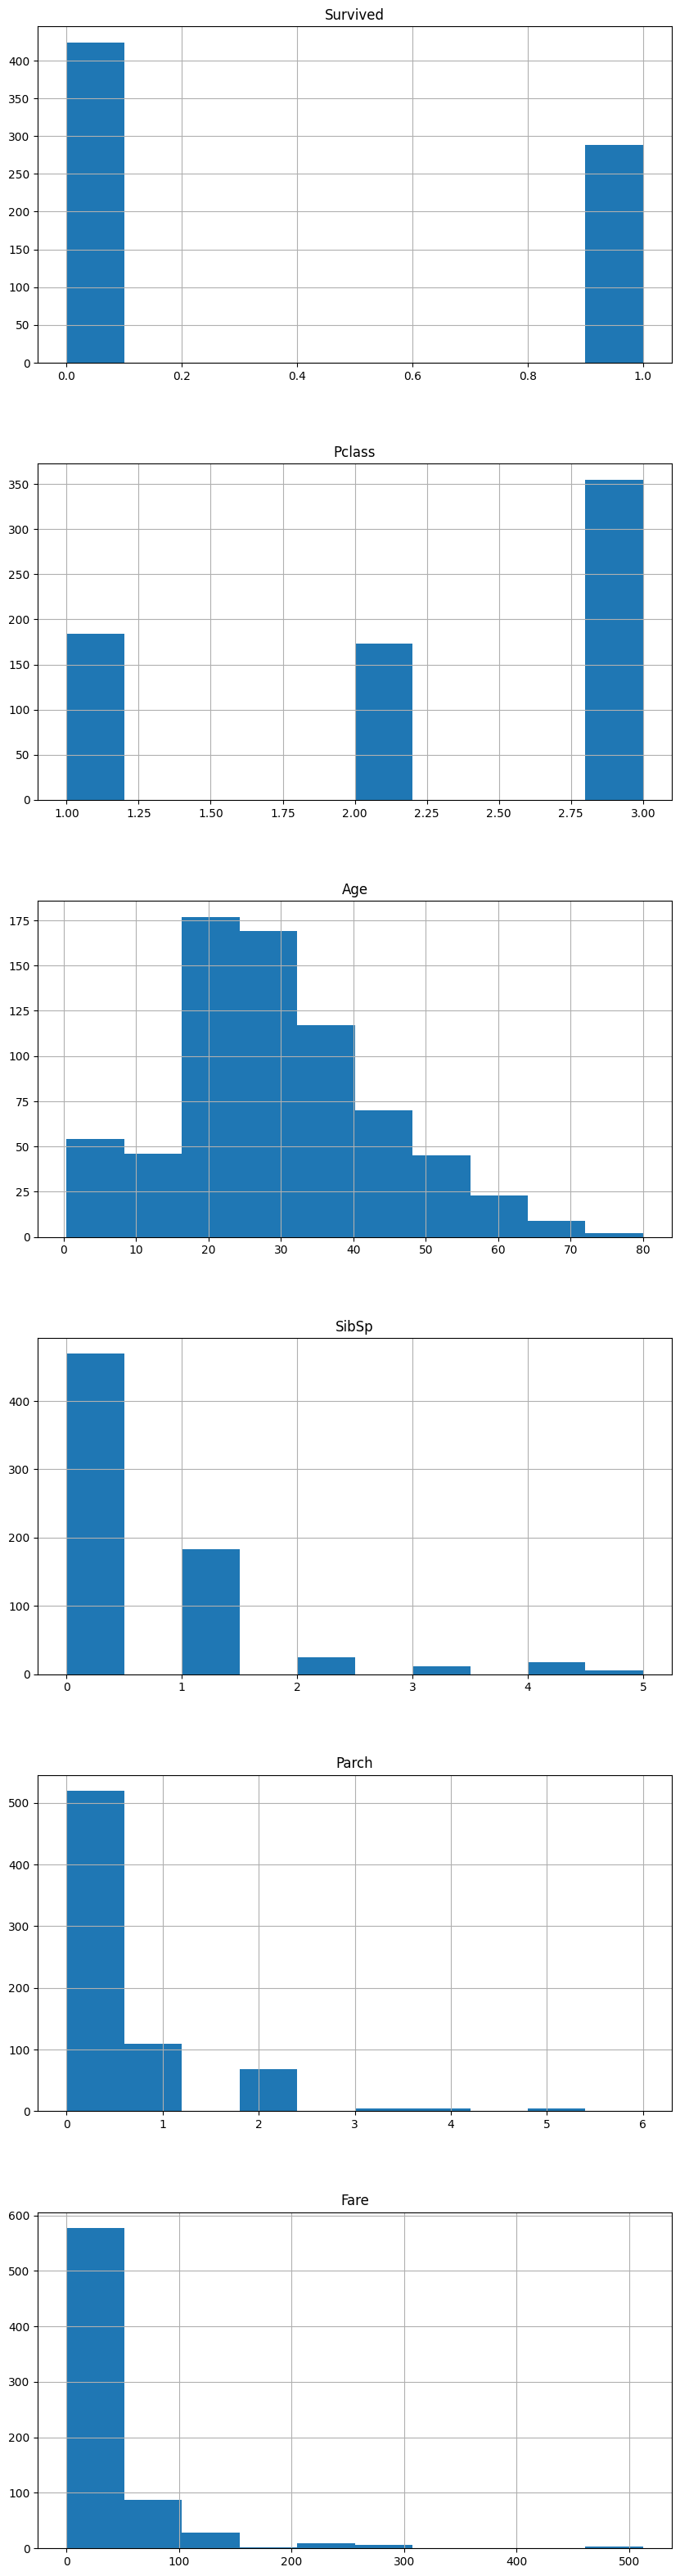

In [ ]:
new_df.hist(layout=(6,1), figsize=(10,40))
plt.show()

### Lable encoding for categorical variabals

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_df["Sex"]=le.fit_transform(new_df["Sex"])
new_df["Embarked"]=le.fit_transform(new_df["Embarked"])


<ipython-input-9-1bd60ad297aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Sex"]=le.fit_transform(new_df["Sex"])
<ipython-input-9-1bd60ad297aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Embarked"]=le.fit_transform(new_df["Embarked"])


In [ ]:
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
new_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.356462,-0.536762,-0.082446,-0.015523,0.095265,0.266100,-0.181979
Pclass,-0.356462,1.000000,0.150826,-0.365902,0.065187,0.023666,-0.552893,0.244145
Sex,-0.536762,0.150826,1.000000,0.099037,-0.106296,-0.249543,-0.182457,0.109639
Age,-0.082446,-0.365902,0.099037,1.000000,-0.307351,-0.187896,0.093143,-0.032565
SibSp,-0.015523,0.065187,-0.106296,-0.307351,1.000000,0.383338,0.139860,0.033064
Parch,0.095265,0.023666,-0.249543,-0.187896,0.383338,1.000000,0.206624,0.011803
Fare,0.266100,-0.552893,-0.182457,0.093143,0.139860,0.206624,1.000000,-0.283510
Embarked,-0.181979,0.244145,0.109639,-0.032565,0.033064,0.011803,-0.283510,1.000000


In [ ]:
X=new_df[['Pclass','Sex',"Embarked","Age"]].reset_index(drop=True)
X

,Pclass,Sex,Embarked,Age
0,3,1,2,22.0
1,1,0,0,38.0
2,3,0,2,26.0
3,1,0,2,35.0
4,3,1,2,35.0
...,...,...,...,...
707,3,0,1,39.0
708,2,1,2,27.0
709,1,0,2,19.0
710,1,1,0,26.0


In [ ]:
Y=new_df["Survived"]

### Model fitting

In [ ]:
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression()
Logreg.fit(X,Y)

y_pred = Logreg.predict(X)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [ ]:
f1 = f1_score(Y,y_pred)
print("F1 score:", f1.round(3))
precision = precision_score(Y,y_pred)
print("Precision:", precision.round(3))
recall = recall_score(Y,y_pred)
print("Recall:", recall.round(3))
AS = accuracy_score(Y,y_pred)
print("Accuracy score:", AS.round(3))

F1 score: 0.738
Precision: 0.763
Recall: 0.715
Accuracy score: 0.795


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, y_pred)

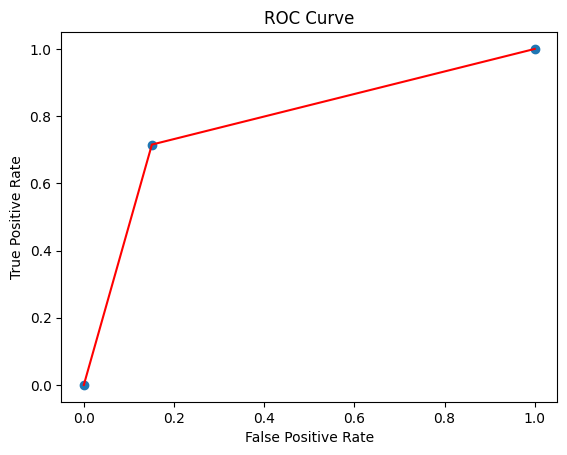

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(fpr, tpr)
plt.plot(fpr, tpr, color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:

print("Area under the curve:", roc_auc_score(Y, y_pred).round(3))

Area under the curve: 0.782


In [ ]:
confusion_matrix(Y,y_pred)


array([[360,  64],
       [ 82, 206]])

### Testing

In [ ]:
test_df.drop(columns=["Cabin","Ticket","SibSp","Parch", "Fare"], inplace=True)
test_df.head()



,PassengerId,Pclass,Name,Sex,Age,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,S


In [ ]:
test_df["Sex"] = le.fit_transform(test_df["Sex"])
test_df["Embarked"] = le.fit_transform(test_df["Embarked"])
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,2


In [ ]:


test_df= test_df[['Pclass', 'PassengerId', 'Name','Sex', 'Embarked', 'Age']]

test_df.dropna(inplace=True)
test_df.isnull().sum()



<ipython-input-23-a1b90deeadb5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.dropna(inplace=True)


Pclass         0
PassengerId    0
Name           0
Sex            0
Embarked       0
Age            0
dtype: int64

#### Y prediction using test data

In [ ]:
y_pred_test_ary = Logreg.predict(test_df.drop(columns=["PassengerId","Name"]))
y_pred_test_ary

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,

## Interview Questions:

1) What is the difference between precision and recall?

ii) Precision: Precision measures the accuracy of positive predictions. It answers the question: "Out of all the positive predictions made by the model, how many were actually correct?"

ii) Recall: Recall measures the completeness of positive predictions. It answers the question: "Out of all the actual positive instances, how many did the model correctly identify?"

2) What is cross-validation, and why is it important in binary classification?

Cross-validation is a technique used to evaluate the performance of a machine learning model by splitting the dataset into multiple subsets (folds). The model is trained on several combinations of these folds, and its performance is evaluated on the remaining data.

In binary classification, cross-validation is important because it helps in:

Detecting and preventing overfitting by providing a more robust estimate of the model's performance.
Obtaining a reliable evaluation of the model's performance across different subsets of the data.
Tuning model hyperparameters effectively by evaluating performance on multiple folds.
Handling imbalanced datasets by ensuring each fold contains a representative sample of both classes.